In [1]:
#Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
# Import sqlalchemy and prepare Python SQL toolkit + Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
#Create engine using hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
#View Measurement 
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
#View Station 
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Precipitation Analysis

In [8]:
#Last Date 
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [84]:
#12 months before the last date
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [18]:
#Retrieve the last 12 months of precipitation data
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >=year_ago).all()

#Store data into a PANDAS dataframe
prcp_df = pd.DataFrame(precipitation_data, columns = ["date", "precipitation"])
prcp_df = prcp_df.dropna(how="any")
prcp_df = prcp_df.set_index("date")
prcp_df = prcp_df.sort_index()
prcp_df.head(20)

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
2016-08-23,1.79
2016-08-24,1.22
2016-08-24,0.08
2016-08-24,2.15


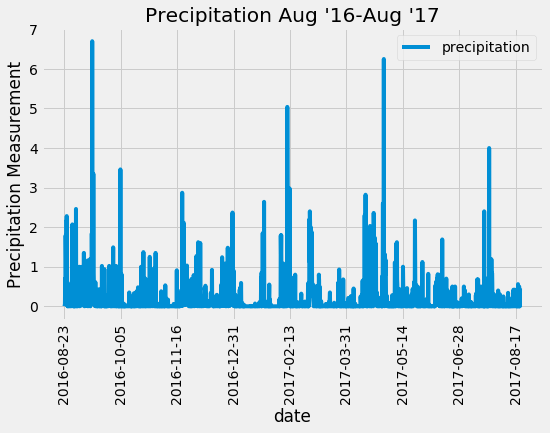

In [35]:
#plot precipitation
prcp_bar = prcp_df.plot(rot = 90,
                        figsize = (8,5),
                        title="Precipitation Aug '16-Aug '17",
                       legend = False)
prcp_bar.set_ylabel("Precipitation Measurement")
prcp_bar.legend(loc='upper right')


In [20]:
#Summary statistics for the precipitation DataFrame
prcp_summ = prcp_df.describe()
prcp_summ

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [37]:
#Query the number of stations
total_stations = session.query(Station.station).count()
total_stations

9

In [45]:
#Query the most active stations
#station_data = session.query(Measurement.station,Measurement.tobs).all()
station_tobs = session.query(Measurement.station,func.count(Measurement.tobs))\
                            .group_by(Measurement.station)\
                            .order_by(func.count(Measurement.tobs).desc())\
                            .all()
station_tobs

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
#Identify the most active station
highest_tobs = station_tobs[0][0]
print(f"The Station with the highest number of observations is {highest_tobs}")

The Station with the highest number of observations is USC00519281


In [66]:
#Query the last 12 months of observation data and store it in a DataFrame
tobs_data = session.query(Measurement.date,Measurement.tobs)\
                          .filter(Measurement.date >= year_ago)\
                          .filter(Measurement.station == "USC00519281")\
                          .all()
tobs_df = pd.DataFrame(tobs_data)

Text(0.5, 1.0, "Station USC00519281 Temp Observation Data Aug '16-Aug '17")

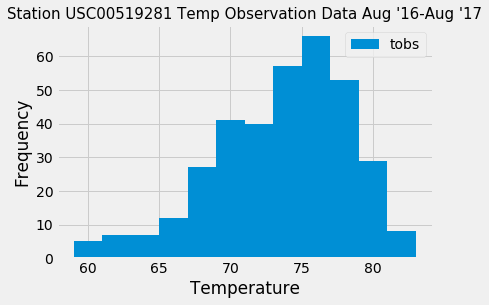

In [73]:
#Plot a histogram of most active station's temperature observation data
tobs_hist = tobs_df.plot.hist(bins=12)
tobs_hist.set_xlabel("Temperature")
tobs_hist.set_title("Station USC00519281 Temp Observation Data Aug '16-Aug '17", fontsize =15)